#Power analysis for binomial test

In [2]:
"""
    Chen and Wyble (2015)
    
    The authors used 20 subjects: 
            n_total = 20
    The null hypothesis (H0) is that 
        performance is equal or lower than the chance level:
            H0: p <= 0.25
    In one experiment, the authors found that 
        40% of the subjects failed to perform correctly:
            20*0.40 = 8 subjecs
        They concluded that this is not significantly different from H0.
        (= H0 is not rejected)
        
    Objective 1
        - Run a binomial test to compute p-value.
    Objective 2
        - Run a power analysis to check 
            whether the experiment (i.e., sample size = 20 ) has 
            enough statistical power.
"""
import scipy.stats as sp

##Objective 1: Computing p-value

In [3]:
"""
    We are doing the one-tailed test.
    This is equivalent of summing all prob. mass func. (pmf) from n_subject to 20
    n_subject = 8

"""
n_total = 20
p = 1.0/4
p_value = sum(sp.binom.pmf(range(8,n_total+1),n_total,p)) 
print 'p_value = ' + str(p_value)

p_value = 0.101811856923


####<font color = 'red'>H0 is not rejected.</font>

##Objective 2: Power analysis

####Reference: Chow et al. 2008. Sample Size Calculations in Clinical Research. 2nd Ed. Chapman & Hall/CRC Biostatistics Series. 
- http://bit.ly/1HuLx2a (p.118)

In [4]:
"""
    0. Stastical power = 1 - beta
        - beta = type II error 
               = false negative (fail to reject H0 when H0 is false)
        - computable in binomial case

    1. Find the critical value (y_c)
        - the number where p to get at least the number of incidents < 0.05 (p value criterion)
            - in our case, y_c = 9 
            - sum(sp.binom.pmf(range(9,n_total+1),n_total,p)) = 0.041
"""
print 'p_value (n=8): ' + str(sum(sp.binom.pmf(range(8,n_total+1),n_total,p)))
print 'p_value (n=9): ' + str(sum(sp.binom.pmf(range(9,n_total+1),n_total,p)))

p_value (n=8): 0.101811856923
p_value (n=9): 0.0409251677065


####<font color = 'red'>Critical vlaue (y_c) = 9</font>

In [22]:
"""
    2. Compute the power (1 - beta)
        - beta = p ( y < y_c | p) (here, p = 0.40 (observed p))
"""
y_c = 9
p = 0.40
beta = sum(sp.binom.pmf(range(y_c),n_total,p))
print 'power= ' +str(1-beta)

power= 0.404401274688


In [34]:
"""
    3. Find out how many samples are needed for power > 0.80
    
"""
# compute powers for different samples size from 20 (n_total) to 60
powers_40 = []
n_vec = range(n_total,n_total*2+1)
for n in n_vec:
    powers_40.append(1 - sum(sp.binom.pmf(range(y_c),n,p)))
        
import numpy as np
powers_arr = np.array(powers_40)
min_sample = n_vec[np.where(powers_arr>=0.80)[0][0]]
print min_sample

# do it again for p = 0.30
powers_30 = []
n_vec = range(n_total,n_total*2+1)
for n in n_vec:
    powers_30.append(1 - sum(sp.binom.pmf(range(y_c),n,0.30)))
        
import numpy as np
powers_arr_30 = np.array(powers_30)
min_sample_30 = n_vec[np.where(powers_arr_30>=0.80)[0][0]]
print min_sample_30

27
37


In [30]:
# Compute power for different p's (when N = 20)
powers_p = []
p_vec = np.linspace(0,1,20)
for p_idx in range(20):
    p_ = p_vec[p_idx]
    powers_p.append(1 - sum(sp.binom.pmf(range(y_c),20,p_)))

In [31]:
powers_p_arr = np.array(powers_p)
min_sample_p = p_vec[np.where(powers_p_arr>=0.80)[0][0]]
print min_sample_p

0.526315789474


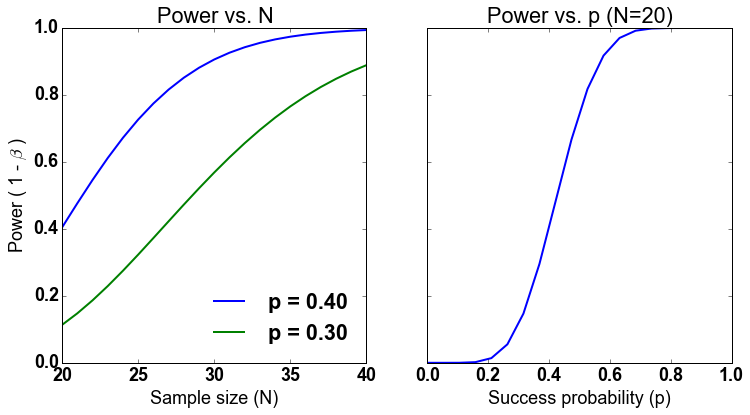

In [46]:
# draw plot
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

# Change font setting
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 18}

import matplotlib
matplotlib.rc('font', **font)
fig.set_size_inches(12, 6)

# ax1: Power vs. sample size
ax1.plot(n_vec, powers_40, lw = 2, label = 'p = 0.40')
ax1.plot(n_vec, powers_30, lw = 2, label = 'p = 0.30')
ax1.set_title('Power vs. N')
ax1.set_xlabel('Sample size (N)')
ax1.set_ylabel('Power ( 1 - ' r'$\beta$' ' )')  # precision
ax1.legend(loc='best',frameon=False)
#ax1.text(32, 0.2, '80%: N >= ' +str(min_sample))

# ax2: Power vs. sample size
ax2.plot(p_vec, powers_p, lw = 2)
ax2.set_title('Power vs. p (N=20)')
ax2.set_xlabel('Success probability (p)')
#ax2.text(0.10, 0.8, '80%: p > ' +str(min_sample_p))

plt.show()